# Практическая работа №1: Исследование двумерного нормального распределения
Выполнил студент гр. 1374 Григорьев Евгений. Вариант №4

## Цель работы
Исследовать свойства двумерного случайного вектора имеющего нормальное распределение, овладеть навыками преобразования нормального вектора в стандартный и в вектор с независимыми компонентами.

## Основные теоретические положения
Случайный $\vec{\zeta}=\left(\zeta_1, ... \zeta_n\right)^{\intercal}: \Omega\rightarrow \mathbb{R}^n$ называют нормальным, если существует вектор стандартных случайных величин $\vec{\eta} = \left(\eta_1, ...\eta_m\right)^{\intercal}$, матрица А размером $(n\times m)$ и вещественный $\vec{B} = \left(b_1, ...b_n\right)^{\intercal}:\\
\vec{\zeta} = A\vec{\eta} + \vec{B}$  
Плотность нормального вектора:  
$p_{\vec{\zeta}}(\vec{x}) = \frac{1}{(2\pi)^{(n/2)}\det{\Sigma}} * \exp{(-\frac{1}{2}(\vec{x} - \vec{\mu})^{\intercal}\Sigma^{-1}(\vec{x} -\vec{\mu}))}\\
\vec{\mu} = \mathbb{E}\vec{\zeta}=(\mathbb{E}\zeta_1, ... \mathbb{E}\zeta_n)^{\intercal}\\
\Sigma = \{\sigma_{i,j} \}^n_{i, j=1,1}, \sigma_{i, j} = \mathop{\mathrm{cov}}\nolimits(\zeta_i, \zeta_j)
$  
Свойства:
1.   Параметры многомерного нормального распределения (далее - МНР) полностью описывают его форму
2.   МНР устойчиво относительно линейных преобразований. $A\vec{\zeta} + B \sim \mathcal{N}(A\vec{\mu}+B, A\Sigma^{-1}A^{T})$
3.   Условные и безусловные распределения, полученные из МНР - являются нормальными распределениями

Формула для плотности условного распределения:  
$p_{\xi, \eta=y}(x) = \frac{p_{\xi, \eta}(x, y)}{p_{\eta}(y)}$




## Постановка задачи
Для заданного двумерного нормального вектора $p_{\xi, \eta}(x, y) = C * \exp{(-\frac{1}{2}(3x^2 + 4xy + 6y^2 + 8 x -4y + 10))}$  
  необходимо вычислить числовые характеристики и выполнить заданные преобразования. Полученные результаты содержательно проинтерпретировать.

###№1

$ q(x, y) = 3x^2 + 4xy + 6y^2 + 8x -y + 10 = (3x^2 + 4xy + 8x) + 6y^2 - y4 + 10=$   
$=3(x + \frac{2}{3}(y + 2))^2 + \frac{14}{3}(y - 1)^2 = 3(x + 2)^2 + 4(y - 1)(x + 2) + 6(y - 1)^2$  
$
\\=>  
\vec{\mu} = \left(\begin{array}{cc} -2 \\ 1 \end{array}\right)
\\\Sigma ^{-1}= \left(\begin{array}{cc} 3 & 2 \\ 2 & 6 \end{array}\right) => \Sigma= \frac{1}{14}\left(\begin{array}{c} 6 & -2 \\ -2 & 3 \end{array}\right)$  
$c = \frac{\sqrt{14}}{2\pi}$


3.0*(x - -2) ** 2 + 4.0*(x - -2)*(y - 1) + 6.0*(y - 1) ** 2


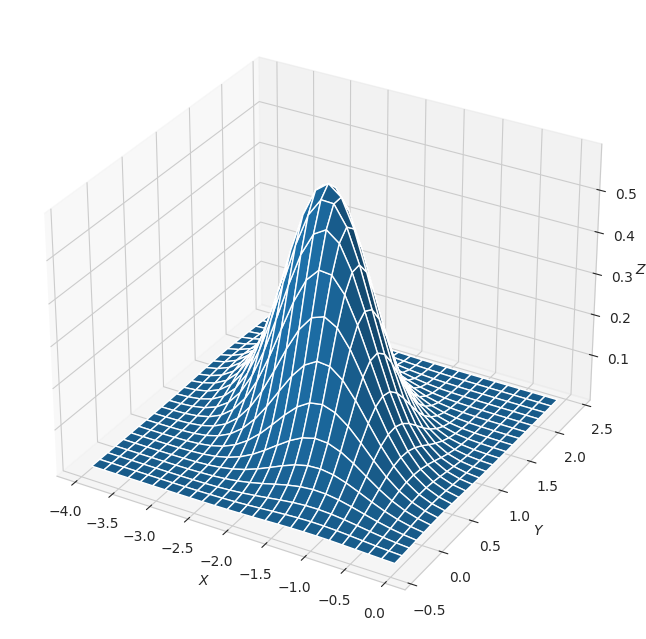

In [54]:
import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
import numexpr as ne

def FUNC_Z(x, y, ex, c):
  ex = ne.evaluate(ex, {'x': x, 'y': y})
  return c * np.exp(-1/2 * ex)
def plot_density(mu, sigm, num=25, amount_sigm=3):

  sb.set_style('whitegrid')
  ex_zu = mu[0, 0]
  ex_nu = mu[1, 0]

  i_sigm = np.linalg.inv(sigm)
  ax = i_sigm[0, 0]
  by = i_sigm[1, 1]
  cc = 2 * i_sigm[1, 0]

  ex = f'{ax}*(x - {ex_zu}) ** 2 + {cc}*(x - {ex_zu})*(y - {ex_nu}) + {by}*(y - {ex_nu}) ** 2'
  C = 1 / (
      (2 * np.pi) ** (mu.shape[0] / 2) * np.linalg.det(sigm) ** 0.5
      )
  print(ex)
  rd_zu = sigm[0, 0] ** 0.5 * amount_sigm
  rd_nu = sigm[1, 1] ** 0.5 * amount_sigm

  x_plot1 = np.linspace(ex_zu - rd_zu, ex_zu + rd_zu, num)
  y_plot1 = np.linspace(ex_nu - rd_nu, ex_nu + rd_nu, num)
  plot1, plot2 = np.meshgrid(x_plot1, y_plot1)
  plot3 = FUNC_Z(plot1, plot2, ex, C)

  fig = plot.figure(figsize=(8,10))

  axes = fig.add_subplot(projection='3d')

  axes.set_xlabel('$X$')
  axes.set_ylabel('$Y$')
  axes.set_zlabel(r'$Z$', labelpad=-1)
  axes.plot_surface(plot1, plot2, plot3)
  plot.show()


mu = np.array([-2, 1]).reshape(-1, 1)
sigm = np.array([
    [6/14, -2/14],
    [-2/14, 3/14]
])
plot_density(mu, sigm)

### №2

$q(x, y) = (\frac{3}{\sqrt{3}}x + \frac{2}{\sqrt{3}}y + \frac{4}{\sqrt{3}})^2 + (\frac{14}{3}y + \frac{14}{3})^2$  
$\\\begin{equation}
\vec{\zeta_{st}}
=\left(\begin{array}{cc} \frac{3}{\sqrt{3}} & \frac{\sqrt{3}}{3} \\ 0 & \sqrt{\frac{14}{3}} \end{array}\right)\vec{\zeta}\ +\left(\begin{array}{c} \frac{2}{\sqrt{3}} \\ -\sqrt{\frac{14}{3}} \end{array}\right) \end{equation}$

### №3

$\Sigma ^{-1} = \left(\begin{array}{cc} 3 & 2 \\ 2 & 6 \end{array}\right) $  
$
\begin{vmatrix} 3-\lambda & 2 \\ 2 & 6-\lambda \end{vmatrix} = (\lambda - 2)(\lambda - 7) => \lambda_{1} = 2; \lambda_{2} = 7 $  
$
\left(\begin{array}{cc|} 1 & 2 \\ 2 & 4 \end{array} \begin{array}{cc} 0\\0 \end{array}\right) => \vec{v_1} = \left(\begin{array}{cc} -2 \\ 1\end{array}\right)$  
$
\left(\begin{array}{cc|} -4 & 2 \\ 2 & -1 \end{array}\begin{array}{cc} 0 \\ 0  \end{array}\right) => \vec{v_2} = \left(\begin{array}{cc} 1 \\ 2\end{array}\right)$  
$
Q^{\intercal} = \frac{1}{\sqrt{5}} \left(\begin{array}{cc} -2 & 1 \\ 1 & 2 \end{array}\right) =>
Q = \frac{1}{\sqrt{5}} \left(\begin{array}{cc} -2 & 1 \\ 1 & 2 \end{array}\right)$  
$
\vec{\zeta_3} = Q\vec{\zeta}$  
$
\mu_3= \frac{1}{\sqrt{5}}\left(\begin{array}{cc} 5 \\ 0\end{array}\right)\\
\Sigma_3 = \left(\begin{array}{cc} \frac{1}{2} & 0 \\ 0 & \frac{1}{7} \end{array}\right)
$

2.0*(x - 5) ** 2 + 0.0*(x - 5)*(y - 0) + 7.0*(y - 0) ** 2


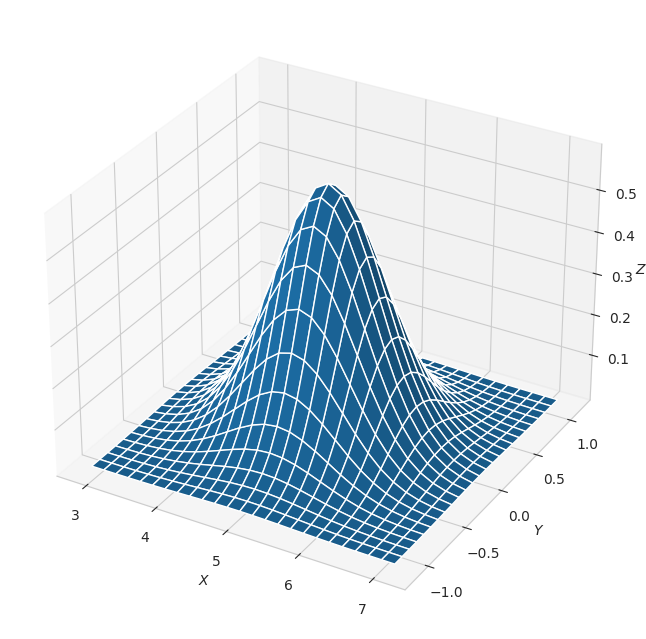

In [55]:
#plot

mu = np.array([5, 0]).reshape(-1, 1)
sigm = np.array([
    [0.5, 0],
    [0, 1/7]
])
plot_density(mu, sigm)


### №4

$\zeta_4 = \left(\begin{array}{cc} 2 & 3 \\ -1 & -2 \end{array}\right) \left(\begin{array}{cc} \xi \\ \eta \end{array}\right)$  
$
\mu_4 = \left(\begin{array}{cc} 2 & 3 \\ -1 & -2 \end{array}\right)*\vec{\mu} = \left(\begin{array}{cc} -1 \\ 0 \end{array}\right)$  
$
\Sigma_4 = \left(\begin{array}{cc} 2 & 3 \\ -1 & -2 \end{array}\right)\frac{1}{14}\left(\begin{array}{c} 6 & -2 \\ -2 & 3 \end{array}\right)\left(\begin{array}{cc} 2 & -1 \\ 3 & -2 \end{array}\right) = \frac{1}{14}\left(\begin{array}{cc} 27 & -16 \\ -16 & 10 \end{array}\right)$  
$
\Sigma_4^{-1} = \left(\begin{array}{cc} 10 & 16 \\ 16 & 27 \end{array}\right)$  
$
p_{\zeta_4}(\vec{x}) = \frac{\sqrt{14}}{2\pi} * \exp(-\frac{1}{2}(\vec{x} - \left(\begin{array}{cc} -1 \\ 0 \end{array}\right))^{\intercal}\left(\begin{array}{cc} 10 & 16 \\ 16 & 27 \end{array}\right) (\vec{x} - \left(\begin{array}{cc} -1 \\ 0 \end{array}\right))
$

9.999999999999984*(x - -1) ** 2 + 31.99999999999995*(x - -1)*(y - 0) + 26.99999999999996*(y - 0) ** 2


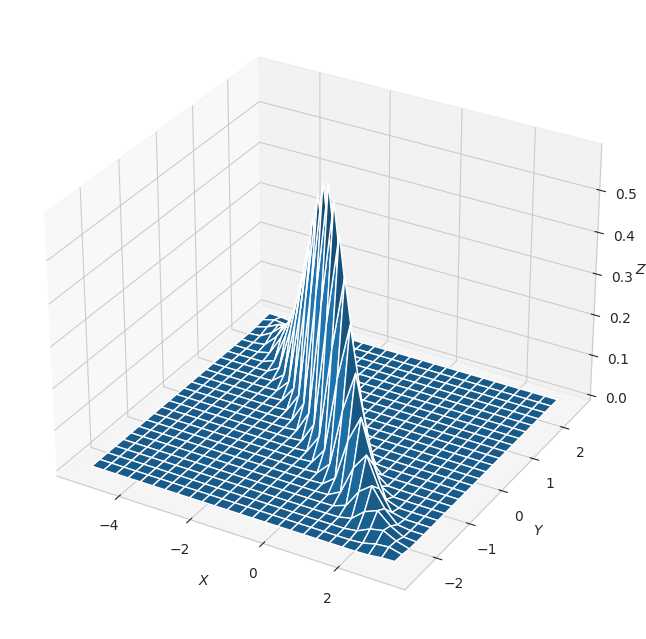

In [56]:
# plot
mu = np.array([-1, 0]).reshape(-1, 1)
sigm = np.array([
    [27/14, -16/14],
    [-16/14, 10/14]
])
plot_density(mu, sigm)

### №5

$
p_{\eta}(y) = \frac{1}{\sqrt{2\pi}\sqrt{\frac{3}{14}}}\exp(-\frac{1}{2}\frac{14}{3}(y - 1)^2 )$  
$
p_{\xi|\eta=y}(x) = \frac{\sqrt{3}}{\sqrt{2\pi}}\exp(3(x + 2) ^ 2 + 4(y - 1)(x + 2) + 6(y - 1) ^ 2 - \frac{14}{3}(y - 1) ^ 2) = \frac{\sqrt{3}}{\sqrt{2\pi}}\exp(-\frac{1}{2}3(x-(-\frac{2}{3}y - \frac{4}{3}))^2)$  
$
\mathbb{E}(\xi|\eta=y) = -\frac{2}{3}y - \frac{4}{3}$  
$
\mathbb{D}(\xi|\eta=y) = 3
$  
Здесь главное помнить, что одномерное НР - частный случай многомерного НР.

## Выводы

В работе были проделаны линейные преобразования над МНР, построены графики плотностей различных МНР.  
Также была посчитана плотность условного распределения, для этого же распределения были вычислены матожидание и дисперсия.